# **AP157 Module C Lab Assignment**

## Module C1: Networks

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.

_Credits_: The sample social network used is taken from https://nauczanki.wordpress.com/2014/11/10/social-network-analysis-basics-in-300-words-dalmooc-assignment-week-3/, which in turn is taken from an unspecified MOOC assignment.

### Student Information

_Full Name (Last Name, First Name)_: David D. Daffon\
_Student No._: 2021-04594\
_Section_: THY-TX-1

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: David D. Daffon**

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/30
* Part 2 - []/30
* Part 3 - []/30
* Part 4 - []/40

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

For all parts of this assignment,  refer to the diagram of the sample social network in the Google Drive "Datasets" Folder (https://drive.google.com/file/d/1DkAK44GfocX0bmlSfK5Q6cbYXAUkixyj/view?usp=drive_link)

### PART 1 - Network generation and characteristics *(30 points)*

1. Using the Python package networkx, define a network that represents the social network of friends in the diagram. *(15 points)*  

2. Calculate the ff. network characteristics: *(15 points; 5 points each)*
- Diameter
- Density
- Average Degree

3. Create the degree distribution plot and briefly discuss what it tells us about this social network. *(10 points)*

#### Preliminaries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
%matplotlib inline

Version check

In [3]:
nx.__version__

'3.3'

#### Diagram

I used the networkx library to create and graph the necessary diagram, which I name the "friendgroup diagram." I defined the nodes as the persons in the given diagram, contained in <code>p_list</code>, and the relationships are contained in <code>f_list</code>.

I used the nx.spring_layout function to create a plot of my desired dimensions. This kind of layout better shows the centrality of a network. Furthermore, I also set a variable for the seed argument so that I get the same plot each time.

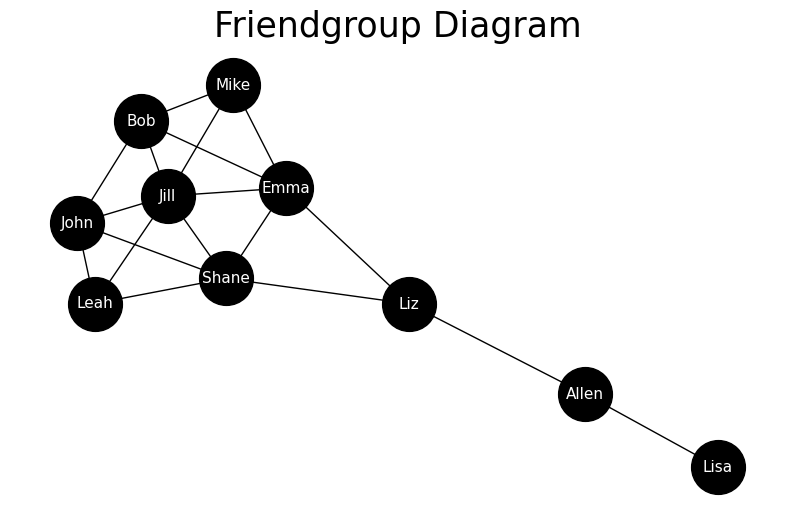

In [4]:
G = nx.Graph() # creating graph object
seed = 1 # declaring seed variable as 1

p_list = ["Mike", "Bob", "John", "Leah", "Shane", "Emma", "Jill", "Liz", "Allen", "Lisa"] # nodes (persons)

f_list = [("Mike", "Bob"), ("Mike", "Emma"), ("Mike", "Jill"), # edges (relationships)
 ("Bob", "John"), ("Bob", "Emma"), ("Bob", "Jill"),
 ("John", "Leah"), ("John", "Shane"), ("John", "Jill"),
 ("Leah", "Shane"), ("Leah", "Jill"),
 ("Shane", "Liz"), ("Shane", "Emma"), ("Shane", "Jill"),
 ("Liz", "Allen"), ("Liz", "Emma"),
 ("Emma", "Jill"), ("Lisa", "Allen")]

G.add_nodes_from(p_list) # creating nodes in graph object G
G.add_edges_from(f_list, length=20) # defining edges in graph object G
pos = nx.spring_layout(G, seed=seed) # setting spring layout and using seed

plt.figure(figsize=(10, 6)) # setting figure size
nx.draw_networkx(G, # plotting G
        pos=pos,
        with_labels=True,
        node_color='black',
        node_size=1500,
        font_color='white',
        font_size=11)
plt.title("Friendgroup Diagram", fontsize=25)
plt.axis('off') # (I don't like how it looks with the axes)
plt.show()

#### Network characteristics

The diameter of a network is the longest shortest path between any two nodes in the network. It is a measure of eccentricity.

In [5]:
diameter = nx.diameter(G) # taking the diameter using the built-in networkx function
print("Diameter: ", diameter)

Diameter:  4


The density of a network is essentially how many edges exist over all possible edges. As such, for undirected graphs density is given by:

$$ \text{density}_{\text{undirected}} = \frac{\text{total edges}}{\text{total edges possible}} = \frac{2m}{n(n-1)} $$

where $m$ is the total number of edges and $n$ is the total number of nodes.

In [6]:
density = nx.density(G) # taking the density using the built-in networkx function
print("Density: ", density)

density_manual = 2*nx.number_of_edges(G)/(nx.number_of_nodes(G)*(nx.number_of_nodes(G)-1))
print("Density (manually computed): ", density_manual)

Density:  0.4
Density (manually computed):  0.4


The average degree of a network is the mean degree of each node in the network. For undirected networks it is given by:

$$ \text{degree}_\text{average} = \frac{\text{total edges}}{\text{total nodes}} = \frac{2L}{N}$$

where $L$ is the total number of edges and N is the total number of nodes.

In [7]:
ave_deg_manual = 2*nx.number_of_edges(G)/nx.number_of_nodes(G) # taking the average degree manually
print("Average Degree: ", ave_deg_manual)

Average Degree:  3.6


### PART 2 - Centrality Measures *(30 points)*

Generate a table of centrality measures per node. Columns are:
- Name
- Degree Centrality
- Betweenness Centrality
- Closeness Centrality

Briefly discuss who are the most "central" people in the social network and why.

I used built-in networkx functions to compute for the needed centrality measures. Using a function I defined, I rounded off the results and stored them as lists. Said lists are then stored in a dict object, which is then used to create a dataframe which serves as the final "table" for the results.

In [8]:
def rounder(in_list, r): # defining function to round off the results iteratively
  out_list = [round(i, r) for i in in_list]
  return out_list

names = list(G.nodes()) # getting the names
deg_cents = rounder(list(nx.degree_centrality(G).values()), 3) # getting the degree centrality
bet_cents = rounder(list(nx.betweenness_centrality(G).values()), 3) # getting the betweenness centrality
clo_cents = rounder(list(nx.closeness_centrality(G).values()), 3) # getting the closeness centrality

print(names, "\n", deg_cents, "\n", bet_cents, "\n", clo_cents) # printing for inspection

['Mike', 'Bob', 'John', 'Leah', 'Shane', 'Emma', 'Jill', 'Liz', 'Allen', 'Lisa'] 
 [0.333, 0.444, 0.444, 0.333, 0.556, 0.556, 0.667, 0.333, 0.222, 0.111] 
 [0.0, 0.023, 0.023, 0.0, 0.231, 0.231, 0.102, 0.389, 0.222, 0.0] 
 [0.5, 0.529, 0.529, 0.5, 0.643, 0.643, 0.6, 0.6, 0.429, 0.31]


In [9]:
dict1 = {"Name": names,
         "Degree Centrality": deg_cents,
         "Betweenness Centrality": bet_cents,
         "Closeness Centrality": clo_cents} # creating a dict object to store lists and column names
df = pd.DataFrame(dict1) # using dict object to create dataframe

display(df) # displaying dataframe

,Name,Degree Centrality,Betweenness Centrality,Closeness Centrality
0,Mike,0.333,0.000,0.500
1,Bob,0.444,0.023,0.529
2,John,0.444,0.023,0.529
3,Leah,0.333,0.000,0.500
4,Shane,0.556,0.231,0.643
5,Emma,0.556,0.231,0.643
6,Jill,0.667,0.102,0.600
7,Liz,0.333,0.389,0.600
8,Allen,0.222,0.222,0.429
9,Lisa,0.111,0.000,0.310


Once I have created and displayed the table, I then plotted the results for each centrality measure in a figure so that it is more easily visualized. By doing so, comparing the centrality measures of the persons in the network is more intuitive.

[Text(0, 0.0, '0.0'),
 Text(0, 0.09, '0.09'),
 Text(0, 0.18, '0.18'),
 Text(0, 0.28, '0.28'),
 Text(0, 0.37, '0.37'),
 Text(0, 0.46, '0.46'),
 Text(0, 0.55, '0.55'),
 Text(0, 0.64, '0.64')]

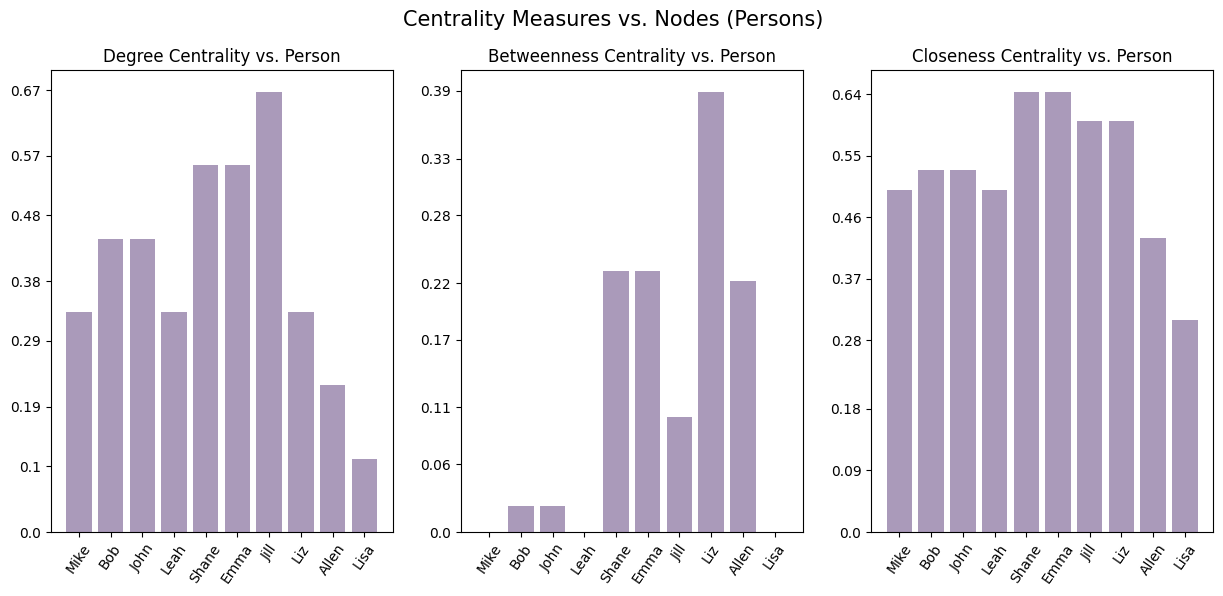

In [10]:
y1ticks = y1labels = rounder(np.linspace(0, np.max(deg_cents), 8), 2) # defining yticks and ylabels
y2ticks = y2labels = rounder(np.linspace(0, np.max(bet_cents), 8), 2)
y3ticks = y3labels = rounder(np.linspace(0, np.max(clo_cents), 8), 2)

xticks = xlabels = names # defining xticks and xlabels

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 6)) # subplots
fig.suptitle('Centrality Measures vs. Nodes (Persons)', fontsize=15) # title of entire plot

ax1.set_title("Degree Centrality vs. Person") # subplot for degree centrality
ax1.bar(names, deg_cents, color='#AA9ABA')
ax1.set_xticks(xticks)
ax1.set_xticklabels(xlabels, rotation=55)
ax1.set_yticks(y1ticks)
ax1.set_yticklabels(y1labels)

ax2.set_title("Betweenness Centrality vs. Person") # subplot for degree centrality
ax2.bar(names, bet_cents, color='#AA9ABA')
ax2.set_xticks(xticks)
ax2.set_xticklabels(xlabels, rotation=55)
ax2.set_yticks(y2ticks)
ax2.set_yticklabels(y2labels)

ax3.set_title("Closeness Centrality vs. Person") # subplot for degree centrality
ax3.bar(names, clo_cents, color='#AA9ABA')
ax3.set_xticks(xticks)
ax3.set_xticklabels(xlabels, rotation=55)
ax3.set_yticks(y3ticks)
ax3.set_yticklabels(y3labels)

In terms of degree centrality, it is apparent from the figure that Jill is the most central individual in the network. This aligns with a qualitative inspection of the network graph, where Jill serves somewhat like a circle's centerpoint and is surrounded by a community of individuals with links to her. Consequently, Liz, who is isolated, has the lowest degree centrality of the group: having only linked with Allen.

In contrast, Liz is easily the most central individual in terms of betweenness centrality. This also makes sense, since Liz serves like a "bridge" between the community surrounded around Jill and the isolated Allen and Lisa. Furthermore, Mike, Leah, and Lisa all have betweenness centrality measures of zero because there is always an alternative link from an individual to another that doesn't go through them.

For closeness centrality, Shane and Emma are equally in the lead. This agrees with the graph once more since Shane and Emma are the closes to anyone else in the graph. Jill is more "central" in the sense of degree, but Shane and Emma are closer to the Liz, and by extension the isolated Allen and Lisa.




### PART 3 - Identify communities *(40 points)*

1. Identify communities in the social network using *(30 points)*:
- Louvain community detection algorithm
- Any other community detection algorithm of your choice

2. Calculate the modularity of the partitions from the two community detection algorithms. *(10 points)*

Briefly describe the algorithm you used and compare the results from the two algorithms.

#### Louvain community detection algorithm

The networkx library contains a function that performs the Louvain community detection algorithm on a given community. Interestingly, when we look at the functions parameters, we see the seed and resolution parameters.

The seed parameter controls the randomness in the algorithm since it controls the random number generation. Hence, different seeds usually yield different results (though it is not guaranteed: it is supposed to be random, after all).

The Louvain algorithm works by assigning each node to its own community. It then moves each node to its neighboring communities and tries to find the maximum modularity gain; that is if the modularity does not increase after a merge, it remains in its original community.

In [11]:
for i in range(10): # iterate from 0 to 9
  print(nx.community.louvain_communities(G, seed=i, resolution=1)) # seed varies, resolution = 1 is constant

[{'Jill', 'Emma', 'Mike', 'Bob'}, {'Shane', 'John', 'Leah'}, {'Lisa', 'Allen', 'Liz'}]
[{'Jill', 'Emma', 'Mike', 'Bob'}, {'Shane', 'John', 'Leah'}, {'Lisa', 'Allen', 'Liz'}]
[{'Emma', 'Mike', 'Bob'}, {'Jill', 'Shane', 'John', 'Leah'}, {'Lisa', 'Allen', 'Liz'}]
[{'Jill', 'Emma', 'Mike', 'Bob'}, {'Shane', 'John', 'Leah'}, {'Lisa', 'Allen', 'Liz'}]
[{'Jill', 'Emma', 'Mike', 'Bob'}, {'Shane', 'John', 'Leah'}, {'Lisa', 'Allen', 'Liz'}]
[{'Jill', 'Emma', 'Mike', 'Bob'}, {'Shane', 'John', 'Leah'}, {'Lisa', 'Allen', 'Liz'}]
[{'Emma', 'Mike', 'Bob'}, {'Jill', 'Shane', 'John', 'Leah'}, {'Lisa', 'Allen', 'Liz'}]
[{'Emma', 'Mike', 'Bob'}, {'Jill', 'Shane', 'John', 'Leah'}, {'Lisa', 'Allen', 'Liz'}]
[{'Emma', 'Mike', 'Bob'}, {'Jill', 'Shane', 'John', 'Leah'}, {'Lisa', 'Allen', 'Liz'}]
[{'Jill', 'Emma', 'Mike', 'Bob'}, {'Shane', 'John', 'Leah'}, {'Lisa', 'Allen', 'Liz'}]


However, the same seed yields the same result. This is the main usefulness of the seed parameter.

In [12]:
for i in range(10): # iterate from 0 to 9
  print(nx.community.louvain_communities(G, seed=1, resolution=1)) # seed constant, resolution = 1 is constant.

[{'Jill', 'Emma', 'Mike', 'Bob'}, {'Shane', 'John', 'Leah'}, {'Lisa', 'Allen', 'Liz'}]
[{'Jill', 'Emma', 'Mike', 'Bob'}, {'Shane', 'John', 'Leah'}, {'Lisa', 'Allen', 'Liz'}]
[{'Jill', 'Emma', 'Mike', 'Bob'}, {'Shane', 'John', 'Leah'}, {'Lisa', 'Allen', 'Liz'}]
[{'Jill', 'Emma', 'Mike', 'Bob'}, {'Shane', 'John', 'Leah'}, {'Lisa', 'Allen', 'Liz'}]
[{'Jill', 'Emma', 'Mike', 'Bob'}, {'Shane', 'John', 'Leah'}, {'Lisa', 'Allen', 'Liz'}]
[{'Jill', 'Emma', 'Mike', 'Bob'}, {'Shane', 'John', 'Leah'}, {'Lisa', 'Allen', 'Liz'}]
[{'Jill', 'Emma', 'Mike', 'Bob'}, {'Shane', 'John', 'Leah'}, {'Lisa', 'Allen', 'Liz'}]
[{'Jill', 'Emma', 'Mike', 'Bob'}, {'Shane', 'John', 'Leah'}, {'Lisa', 'Allen', 'Liz'}]
[{'Jill', 'Emma', 'Mike', 'Bob'}, {'Shane', 'John', 'Leah'}, {'Lisa', 'Allen', 'Liz'}]
[{'Jill', 'Emma', 'Mike', 'Bob'}, {'Shane', 'John', 'Leah'}, {'Lisa', 'Allen', 'Liz'}]


The resolution argument tunes the algorithm to favor larger communities when $\text{resolution} < 1$ and smaller communities when $\text{resolution} > 1$. It is possible to tune the resolution such that it overpowers the seed's randomness.

In [13]:
for i in range(10): # iterate from 0 to 9
  print(nx.community.louvain_communities(G, seed=i, resolution=0.8)) # seed varies, but resolution < 1, forces grouping and overpowers seed

[{'Shane', 'Emma', 'Mike', 'Leah', 'Jill', 'John', 'Bob'}, {'Lisa', 'Allen', 'Liz'}]
[{'Shane', 'Emma', 'Mike', 'Bob', 'Leah', 'Jill', 'John'}, {'Lisa', 'Allen', 'Liz'}]
[{'Shane', 'Emma', 'Mike', 'Bob', 'Leah', 'Jill', 'John'}, {'Lisa', 'Allen', 'Liz'}]
[{'Shane', 'Emma', 'Mike', 'Leah', 'Jill', 'John', 'Bob'}, {'Lisa', 'Allen', 'Liz'}]
[{'Shane', 'Emma', 'Mike', 'Bob', 'Leah', 'Jill', 'John'}, {'Lisa', 'Allen', 'Liz'}]
[{'Shane', 'Emma', 'Mike', 'Bob', 'Leah', 'Jill', 'John'}, {'Lisa', 'Allen', 'Liz'}]
[{'Shane', 'Emma', 'Mike', 'Leah', 'Jill', 'John', 'Bob'}, {'Lisa', 'Allen', 'Liz'}]
[{'Shane', 'Emma', 'Mike', 'Bob', 'Leah', 'Jill', 'John'}, {'Lisa', 'Allen', 'Liz'}]
[{'Shane', 'Emma', 'Mike', 'Bob', 'Leah', 'Jill', 'John'}, {'Lisa', 'Allen', 'Liz'}]
[{'Shane', 'Emma', 'Mike', 'Bob', 'Leah', 'Jill', 'John'}, {'Lisa', 'Allen', 'Liz'}]


I made use of the Louvain community detection algorithm of networkx with parameters <code>seed=1</code> and <code>resolution=0.8</code>.

In [14]:
l_com = nx.community.louvain_communities(G, seed=1, resolution=0.8) # finding the Louvain communities
l_mod = nx.community.modularity(G, l_com) # taking the final modularity of the network
print(l_mod)

0.16666666666666669


I compared this by using the greedy_modularity_communities function set with the same resolution as the Louvain algorithm, and interestingly I got the same results.

In [15]:
g_com = nx.community.greedy_modularity_communities(G, resolution=0.8) # finding the greedy modularity communities
g_mod = nx.community.modularity(G, g_com) # taking the final modularity of the network
print(g_mod)

0.16666666666666669


Upon inspection of the communities, I also found that the communities created were the same.

In [16]:
print(l_com, "\n", g_com) # inspecting the communities created

[{'Shane', 'Emma', 'Mike', 'Bob', 'Leah', 'Jill', 'John'}, {'Lisa', 'Allen', 'Liz'}] 
 [frozenset({'Shane', 'Emma', 'Mike', 'Bob', 'Leah', 'Jill', 'John'}), frozenset({'Lisa', 'Allen', 'Liz'})]


These results seem to make sense because the way greedy_modularity_communities works is very similar to the Louvain algorithm: it assigns each node to its own community, then it repeatedly joins the pairs of communities that yield the greatest increase in modularity until no more increase in modularity is possible. This along with the similar resolutions I set may have contributed to these results.

Plotting Louvain results

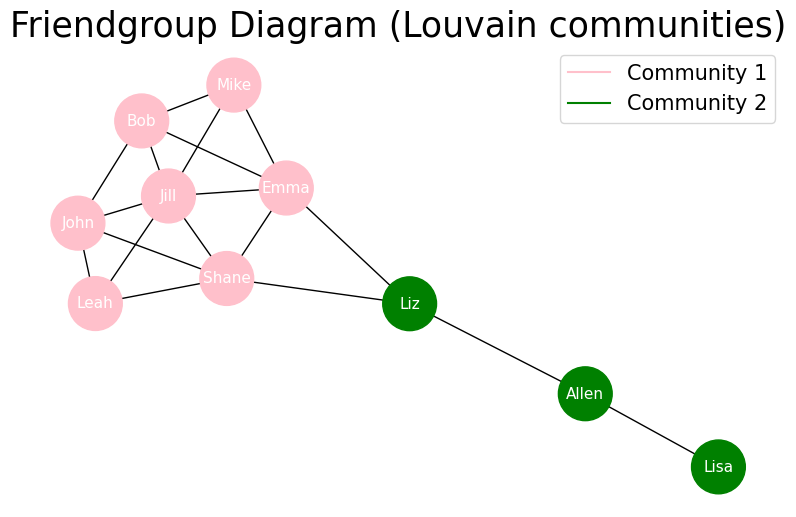

In [42]:
node_colors = [] # plotting the communities by iteratively checking and then assigning colors to nodes
color_map = ['pink', 'green', 'blue']
for node in G.nodes():
  community_found = False
  for i, community in enumerate(l_com):
    if node in community:
      node_colors.append(color_map[i % len(color_map)])
      community_found = True
      break

handles = [] # iteratively assigning labels
for i, communities in enumerate(l_com):
  handles.append(plt.Line2D([], [], color=color_map[i % len(color_map)], label=f"Community {i+1}"))

plt.figure(figsize=(10, 6)) # setting figure size

nx.draw_networkx(G, # plotting G
        pos=pos,
        with_labels=True,
        node_color=node_colors,
        node_size=1500,
        font_color='white',
        font_size=11)

plt.legend(handles=handles, fontsize=15)
plt.title("Friendgroup Diagram (Louvain communities)", fontsize=25)
plt.axis('off') # (I don't like how it looks with the axes)
plt.show()

Plotting greedy modularity results

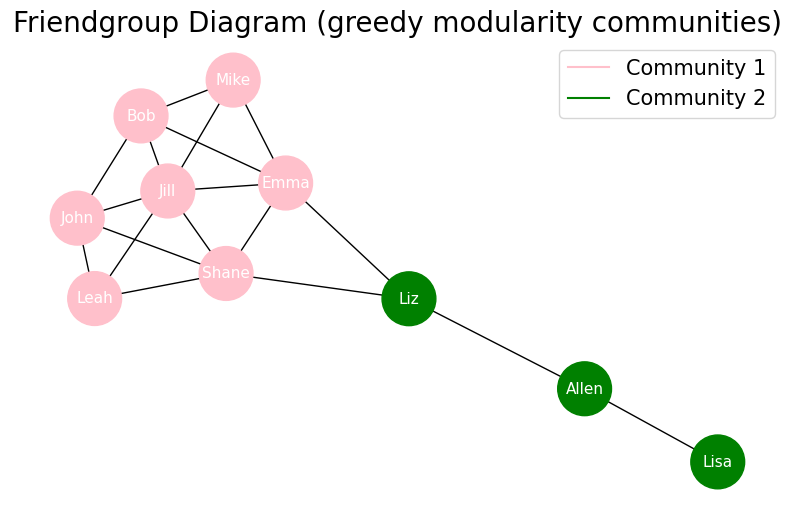

In [43]:
node_colors = [] # plotting the communities by iteratively checking and then assigning colors to nodes
color_map = ['pink', 'green', 'blue']
for node in G.nodes():
  community_found = False
  for i, community in enumerate(g_com):
    if node in community:
      node_colors.append(color_map[i % len(color_map)])
      community_found = True
      break

handles = [] # iteratively assigning labels
for i, communities in enumerate(g_com):
  handles.append(plt.Line2D([], [], color=color_map[i % len(color_map)], label=f"Community {i+1}"))

plt.figure(figsize=(10, 6)) # setting figure size

nx.draw_networkx(G, # plotting G
        pos=pos,
        with_labels=True,
        node_color=node_colors,
        node_size=1500,
        font_color='white',
        font_size=11)

plt.legend(handles=handles, fontsize=15)
plt.title("Friendgroup Diagram (greedy modularity communities)", fontsize=20)
plt.axis('off') # (I don't like how it looks with the axes)
plt.show()

Acknowledgements:  
*   To Janelle Ivy Belarmino, for helping me out with plotting the communities. For the life of me I couldn't figure it out.